# Data Analysis - Part 1 <a id='Data Analysis'></a>

# 1. Contents <a id='1._Contents'></a>
* [Data Analysis](#Data_Analysis)
    * [1. Contents](#1._Contents)
    * [2. Non-NLP](#2._Non-NLP)
        * [2a. Create user-only DataFrame(no blogs)](#2a._Create_user-only_DataFrame(no_blogs))
        * [2b. `age` distribution](#2b._`age`_distribution)
        * [2c. `age` vs. `gender`](#2c._`age`_vs._`gender`)
        * [2d. `industry` vs. `gender`](#2d._`industry`_vs._`gender`)
        * [2e. `industry` vs. `age`](#2e._`industry`_vs._`age`)
        * [2f. `date` distribution](#2f._`date`_distribution)
    * [3. NLP](#3._NLP)

# 2. Non-NLP <a id='2._Non-NLP'></a>

### 2a. Create user-only DataFrame (no blogs)

In order to conduct non-NLP analyses of my data, I have to construct a **new DataFrame**, with each row containing information on one blogger. My **current DataFrame has one row dedicated to each blog post**, which results in different bloggers having uneven numbers of rows to themselves.

In [1]:
import pandas as pd
import os
from tqdm import tqdm

os.chdir('C:\\Users\\yctaa\\Desktop\\Data Science\\Springboard\\Springboard Projects\\Battle of the Sexes - Blogger Edition\\blogs')

keys = {'id','gender','age','industry','sign'}
dict = {k:[] for k in keys}

def extract_features_into_dict(filename):
    "This extracts only the essential information from each filename and puts them into a dictionary"
    dict['id'].append(filename.split('.')[0])
    dict['gender'].append(filename.split('.')[1])
    dict['age'].append(filename.split('.')[2])
    dict['industry'].append(filename.split('.')[3])
    dict['sign'].append(filename.split('.')[4])
    
for filename in tqdm(os.listdir()):
    extract_features_into_dict(filename)

# Convert dictionary into DataFrame
user_data = pd.DataFrame.from_dict(dict)[['id','gender','age','industry','sign']]
user_data.head()

100%|████████████████████████████████████████████████████████████████████████| 19320/19320 [00:00<00:00, 251083.55it/s]


,id,gender,age,industry,sign
0,1000331,female,37,indUnk,Leo
1,1000866,female,17,Student,Libra
2,1004904,male,23,Arts,Capricorn
3,1005076,female,25,Arts,Cancer
4,1005545,male,25,Engineering,Sagittarius


In [2]:
user_data.shape

(19320, 5)

According to the **Blog Authorship Corpus**, the dataset should contain **19,320 bloggers**, which it does. Without any data loss in the transfer process, we are now able to continue with our analysis.

### 2b. `age` distribution <a id='2b._`age`_distribution'></a>

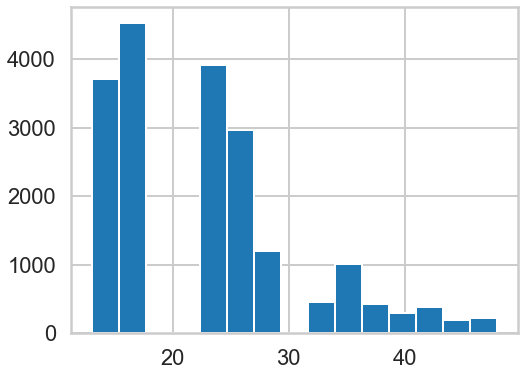

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline
sns.set_style("whitegrid")
sns.set_context("poster")

user_data['age'] = user_data['age'].astype(int)
_ = plt.figure(figsize=(8,6))
_ = plt.hist(data=user_data, x='age', bins=15)

From this plot, we can see that the age distribution in the data is **heavily skewed to the right**. There are also a couple **gaps in the age distribution**.

In [ ]:
age_distribution = [age for age in user_data['age'].value_counts().index]
min(age_distribution), max(age_distribution)
np.setdiff1d(list(range(13,48)),age_distribution)

In [4]:
age_distribution = [age for age in user_data['age'].value_counts().index]
min(age_distribution), max(age_distribution)

(13, 48)

In [5]:
import numpy as np

np.setdiff1d(list(range(13,48)),age_distribution)

array([18, 19, 20, 21, 22, 28, 29, 30, 31, 32])

On closer inspection, we can see that the dataset does not contain any users between the ages of **18-22 and 28-32**.

### 2c. `age` vs. `gender`<a id='2c._`age`_vs._`gender`'></a>

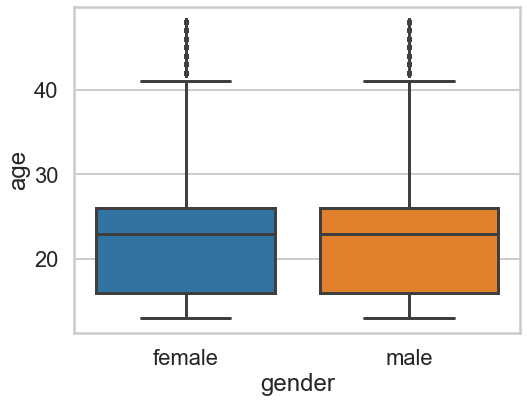

In [6]:
fig, ax = plt.subplots(figsize=(8,6))
_ = sns.boxplot(data=user_data, x='gender', y='age')

There did not seem to be a marked difference in `age` between `gender`s.

### 2d. `industry` vs. `gender` <a id='2d._`industry`_vs._`gender`'></a>

Another interaction that may be interesting to look at is the number of male and female blogger in each `industry`.

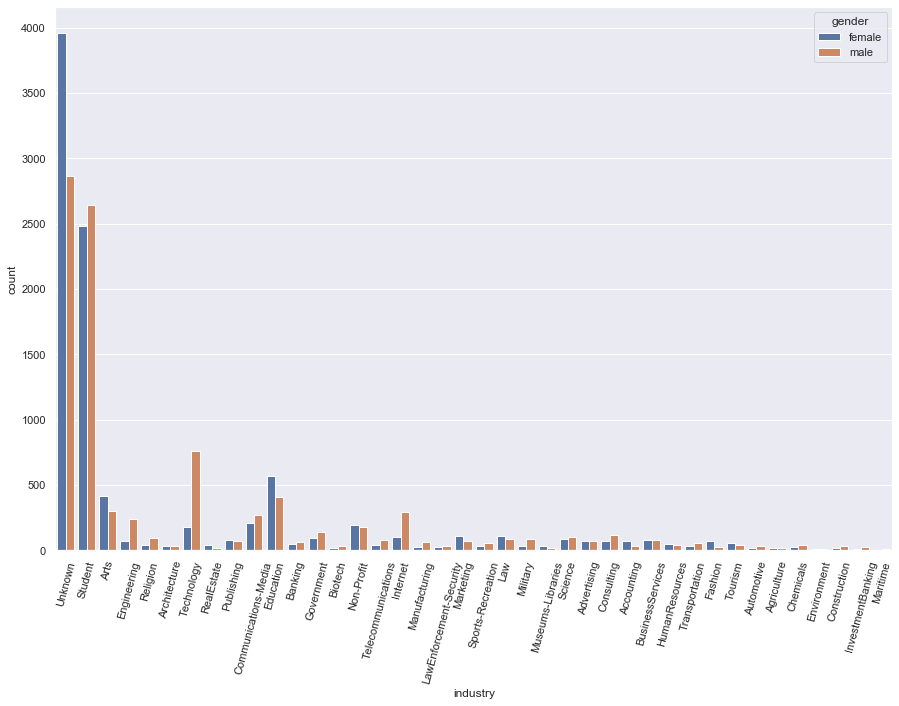

In [256]:
# Replace 'indUnk' with 'Unknown'
user_data = user_data.replace('indUnk', 'Unknown')

# Plot interaction
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.countplot(data=user_data, x='industry', hue='gender')
ax = ax.set_xticklabels(ax.get_xticklabels(), rotation=75)
ax = sns.set(font_scale=1)

Since the number of *Unknown* industries is so large, I will **remove that from our plot** so that we can see the other industries better. Keeping it in the plot doesn't give us any insights, anyways. I will also scale the plot so that it displays the **ratio of *males* to *females* in each industry**, instead of just the count. This will ensure that all the industries are equally displayed. Finally, since there are **39 industries** in our data, I will discard the industries with **ratio differences under 10%**, saving our valuable plot space for industries that have greater differences in `gender`.

In [8]:
# Extract only the 'gender' and 'industry' columns, removing the Unknown industry at the same time
gender_industry_user_data = user_data[['gender','industry']][user_data[['gender','industry']]['industry'] != 'Unknown']
full_industries_list = list(gender_industry_user_data['industry'].unique())

ratios_list = []
industries_list = []

# Calculate each gender's ratio for every industry and append into a list, discarding industries with ratio differences of <10%
for industry in tqdm(full_industries_list):
    total = len(gender_industry_user_data[gender_industry_user_data['industry'] == industry])
    males = len(gender_industry_user_data[(gender_industry_user_data['industry'] == industry) & (gender_industry_user_data['gender'] == 'male')])
    females = len(gender_industry_user_data[(gender_industry_user_data['industry'] == industry) & (gender_industry_user_data['gender'] == 'female')])
    ratios = [round(males/total,2), round(females/total,2)]
    if abs(ratios[0] - ratios[1]) > 0.1:
        ratios_list.append(ratios)
        industries_list.append(industry)
    else:
        continue

100%|█████████████████████████████████████████████████████████████████████████████████| 39/39 [00:00<00:00, 114.21it/s]


In [9]:
# Sort industries and ratios lists by order of ratios
industries_list_sorted = [industry for ratios,industry in sorted(zip(ratios_list, industries_list))]
ratios_list_sorted = sorted(ratios_list)

# Create new DataFrame with only genders and industries
ratios_user_data = pd.DataFrame(ratios_list_sorted,index=industries_list_sorted, columns=['male','female'])
ratios_user_data.reset_index(inplace=True)
ratios_user_data.columns = ['industry','male','female']
ratios_user_data.head()

,industry,male,female
0,Fashion,0.26,0.74
1,RealEstate,0.29,0.71
2,Accounting,0.30,0.70
3,Museums-Libraries,0.40,0.60
4,Marketing,0.41,0.59


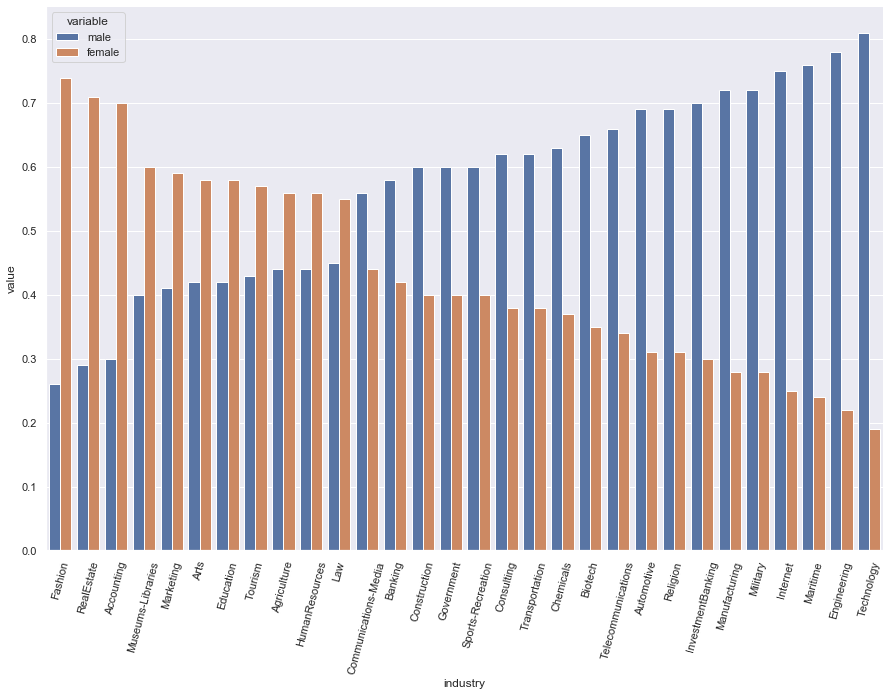

In [10]:
# Barplot ordered by ratios, showing female-dominated industries first
fig, ax1 = plt.subplots(figsize=(15, 10))
tidy = ratios_user_data.melt(id_vars='industry')
sns.barplot(x='industry', y='value', hue='variable', data=tidy, ax=ax1)
sns.despine(fig)
ax1 = ax1.set_xticklabels(ax1.get_xticklabels(), rotation=75)

This barplot shows that ***Fashion* was a very female-dominated industry** in our dataset, while ***Technology* was a very male-dominated industry**. **More than 70% of Fashion bloggers were female, while more than 80% of Technology bloggers were male**. *Real Estate, Accounting, and Museums-Libraries* were the industries with the next-highest proportions of female bloggers, while *Engineering, Maritime, and Internet* jobs had the next-highest proportions of male bloggers. One important thing of note here is that **female bloggers were more prevalent in 11 industries, while male bloggers were more prevalent in 19 industries.**

### 2e. `industry` vs `age` <a id='2e._`industry`_vs._`age`'></a>

Using the same strategy, I will do the same and plot the interaction between `industry` and `age`. To make `age` a binary variable, I will find out the median `age` and split all blogger's into **2 age groups**: *older* and *younger*.

In [11]:
user_data['age'].median()

23.0

It looks like **the median age is 24**, so that will be the cutoff point for our age groups.

In [12]:
# Extract only the 'age' and 'industry' columns, removing the Unknown industry at the same time
age_industry_user_data = user_data[['age','industry']][user_data[['age','industry']]['industry'] != 'Unknown']
full_industries_list = list(age_industry_user_data['industry'].unique())

ratios_list = []
industries_list = []

# Calculate each age group's ratio for every industry and append into a list, discarding industries with ratio differences of 
# <10%
for industry in tqdm(full_industries_list):
    total = len(age_industry_user_data[age_industry_user_data['industry'] == industry])
    younger = len(age_industry_user_data[(age_industry_user_data['industry'] == industry) & 
                                         (age_industry_user_data['age'] < 23)])
    older = len(age_industry_user_data[(age_industry_user_data['industry'] == industry) & 
                                       (age_industry_user_data['age'] >= 23)])
    ratios = [round(younger/total,2), round(older/total,2)]
    if abs(ratios[0] - ratios[1]) > 0.1:
        ratios_list.append(ratios)
        industries_list.append(industry)
    else:
        continue

100%|█████████████████████████████████████████████████████████████████████████████████| 39/39 [00:00<00:00, 136.56it/s]


In [13]:
# Sort industries and ratios lists by order of ratios
industries_list_sorted = [industry for ratios,industry in sorted(zip(ratios_list, industries_list), reverse=True)]
ratios_list_sorted = sorted(ratios_list, reverse=True)

# Create new DataFrame with only genders and industries
ratios_user_data = pd.DataFrame(ratios_list_sorted,index=industries_list_sorted, columns=['younger','older'])
ratios_user_data.reset_index(inplace=True)
ratios_user_data.columns = ['industry','younger','older']
ratios_user_data.head()

,industry,younger,older
0,Student,0.82,0.18
1,Chemicals,0.45,0.55
2,Sports-Recreation,0.44,0.56
3,Agriculture,0.44,0.56
4,Fashion,0.43,0.57


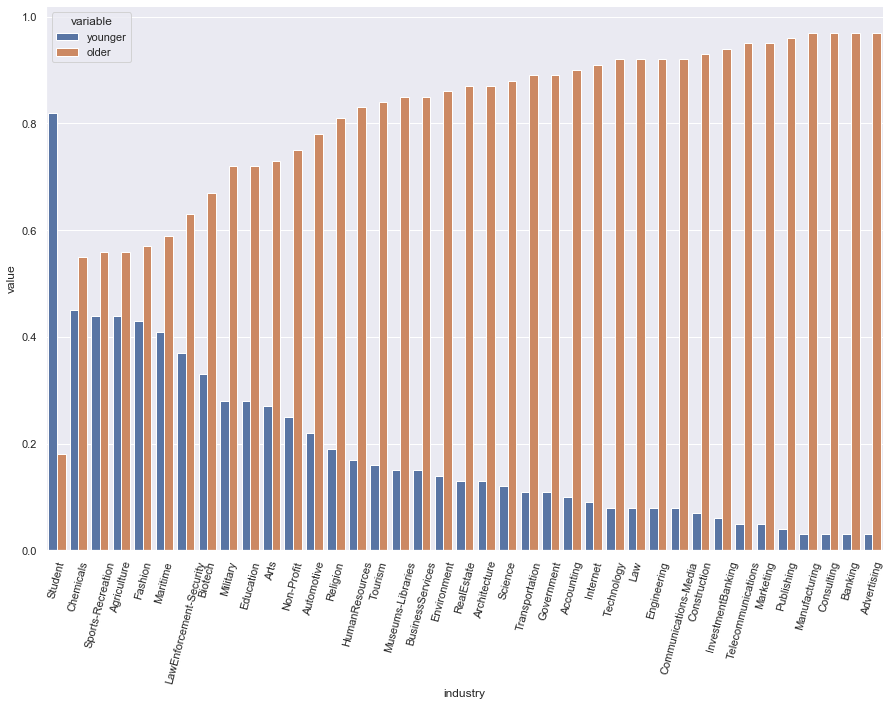

In [108]:
# Barplot ordered by ratios, showing older-dominated industries first
fig, ax1 = plt.subplots(figsize=(15, 10))
tidy = ratios_user_data.melt(id_vars='industry')
sns.barplot(x='industry', y='value', hue='variable', data=tidy, ax=ax1)
sns.despine(fig)
ax1 = ax1.set_xticklabels(ax1.get_xticklabels(), rotation=75)

As we can see from this barplot, **the only industry dominated by younger bloggers was *Student***. This makes sense, as many people under the age of 24 are either in school or recent graduates, and have not had time to cement their careers yet. The 4 industries with the highest proportion of older bloggers were *Advertising, Banking, Consulting, and Manufacturing*.

### 2f. `date` distribution <a id='2f._`date`_distribution'></a>

I can now go back to my **NLP DataFrame** to conduct subsequent analyses. I will begin with a barplot on the `date` distribution.

In [109]:
os.chdir('C:\\Users\\yctaa\\Desktop\\Data Science\\Springboard\\Springboard Projects\\Battle of the Sexes - Blogger Edition')
df = pd.read_csv('df.csv', index_col=0, parse_dates=['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 598418 entries, 0 to 598417
Data columns (total 7 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   id        598418 non-null  int64         
 1   gender    598418 non-null  object        
 2   age       598418 non-null  int64         
 3   industry  598418 non-null  object        
 4   sign      598418 non-null  object        
 5   date      598418 non-null  datetime64[ns]
 6   blog      598418 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 36.5+ MB


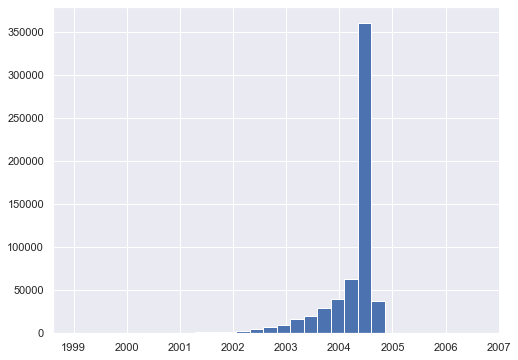

In [110]:
_ = plt.figure(figsize=(8,6))
_ = plt.hist(data=df, x='date', bins=30)

This highly-skewed histogram shows us that a vast majority of the blogs written in our dataset were written in **2004.**